<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
هنرمند
</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این تمرین می‌خواهیم آزمایش کنیم که شبکه‌های عصبی تا چه حد می‌توانند از درک هنری برخوردار شوند؟ 🎨 همچنین با نحوه‌ی پیاده‌سازی انتقال یادگیری و تقویت داده‌های تصویری آشنا شده و تاثیر آن‌ها را در عملکرد مدل بررسی خواهیم کرد. مجموعه‌داده‌ای که در اختیار داریم شامل تصویر چند صد نقاشی از چند نقاش مشهور جهانی است و قصد داریم یک مدل یادگیری عمیق آموزش دهیم که بتواند همچون یک متخصص هنری، با دیدن یک نقاشی که صاحب‌اثر آن هنوز مشخص نیست، به‌درستی حدس بزند که نقاش آن که بوده است.
</font>
</p>

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ای که در اختیار شما قرار گرفته شامل تصاویر آموزشی در پوشه‌ی <code>data</code> و تصاویر آزمون در پوشه‌ی <code>test_data</code> است. نام فایل هر تصویر به‌صورت نام نقاش و یک عدد است. بنابراین پس از بارگیری مجموعه‌داده نیاز است مجموعه‌داده را به‌شکل مناسب‌تری جهت خوانش آن در کد آماده کنیم.
</font>
</p>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگیری مجموعه‌داده
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
به‌دلیل حجم بالای مجموعه‌داده نیاز است آن را جداگانه از <a href="https://drive.google.com/file/d/1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD/view?usp=sharing" target="_blank">این لینک</a> دانلود کرده و فایل‌های داخل آن را استخراج کنید.  توجه داشته باشید که اندازه‌ی مجموعه‌داده حدود ۵۸۰ مگابایت است و پیشنهاد می‌کنیم از محیط گوگل کولب استفاده کرده و به‌صورت مستقیم با دستور زیر این فایل را روی کولب خود بارگیری کنید.
</font>
</p>

`!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD`

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>رفع مشکل عدم امکان دانلود فایل با <code>gdown</code></b></summary>

اگر در هنگام دانلود فایل به‌کمک <code>gdown</code> با خطای عدم اجازه‌ی دسترسی مواجه شدید، کافیست کد زیر را اجرا کرده و دوباره امتحان کنید.

<span dir=ltr style="direction:ltr;">

`!pip install --upgrade --no-cache-dir gdown`

</span>
</details>

In [ ]:
# uncomment the following line to prevent some possible errors
# !pip install --upgrade --no-cache-dir gdown

In [ ]:
# uncomment the following line to download the dataset if you haven't already
!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD

Downloading...
From (original): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD
From (redirected): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD&confirm=t&uuid=38b7d7d3-2e01-4835-be86-ce43982c0f90
To: /content/famous_paintings.zip
100% 611M/611M [00:14<00:00, 40.9MB/s]


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در صورتی‌که فرآیند دانلود کامل شده باشد فایل <code>famous_paintings.zip</code> را در لیست فایل‌های محیط کولب مشاهده خواهید کرد. اکنون می‌توانیم به‌کمک دستور <code>unzip</code> به استخراج تصاویر از فایل <code>zip</code> بپردازیم. از قسمت انتهایی دستور زیر تنها جهت جلوگیری از پرینت اسامی فایل‌های استخراج‌شده در خروجی سلول استفاده شده است.
</font>
</p>

In [ ]:
# uncomment the following line to unzip the dataset if you didn't do it before
!unzip famous_paintings.zip > /dev/null 2>&1

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آماده‌سازی مجموعه‌داده
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا قصد داریم لیست تصاویر و برچسب‌های متناظر را به‌صورت یک دیتافریم آماده کنیم. برای این کار می‌توانیم با دستور <code>glob.glob('data/*')</code> لیست تمام فایل‌های موجود در پوشه‌ی <code>data</code> را بیابیم. پس از آن نیاز است با توجه به نام هر فایل، برچسب آن (نام نقاش) را جدا کرده و در ستون جدیدی ذخیره کنید. به‌عنوان مثال فایلی با نام <code>Peter_Paul_Rubens_93.jpg</code> باید به‌صورت <code>Peter_Paul_Rubens</code> برچسب بخورد.
</font>
</p>

In [6]:
dir_name = 'data/*'
files = glob.glob(dir_name)
df_train = pd.DataFrame({'full_path': files})
df_train['painter'] = df_train['full_path'].apply(lambda x: os.path.basename(x).rsplit('_', 1)[0])
df_train.head()

,full_path,painter
0,data/Pablo_Picasso_103.jpg,Pablo_Picasso
1,data/Peter_Paul_Rubens_83.jpg,Peter_Paul_Rubens
2,data/Pablo_Picasso_143.jpg,Pablo_Picasso
3,data/Rene_Magritte_29.jpg,Rene_Magritte
4,data/Albrecht_Durer_159.jpg,Albrecht_Durer


In [7]:
# get the list of unique painters in the dataset
class_names = df_train.painter.unique()
print(class_names)
print(len(class_names))

['Pablo_Picasso' 'Peter_Paul_Rubens' 'Rene_Magritte' 'Albrecht_Durer'
 'Francisco_Goya' 'Rembrandt' 'Vincent_van_Gogh' 'Marc_Chagall' 'Titian'
 'Mikhail_Vrubel' 'Pierre-Auguste_Renoir' 'Edgar_Degas' 'Alfred_Sisley'
 'Paul_Gauguin' 'Pieter_Bruegel' 'Salvador_Dali' 'Kazimir_Malevich'
 'Andy_Warhol' 'Henri_Matisse' 'Sandro_Botticelli' 'Hieronymus_Bosch'
 'Amedeo_Modigliani' 'Frida_Kahlo' 'Leonardo_da_Vinci' 'Paul_Klee']
25



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
به کمک کد زیر می‌توانیم چند نمونه از تصاویر موجود در مجموعه‌ی آموزشی را مشاهده کنیم. این کد در هربار اجرا، ۸ تصویر را از داخل مجموعه‌ی آموزشی به‌صورت تصادفی انتخاب کرده و نمایش می‌دهد.
</font>
</p>

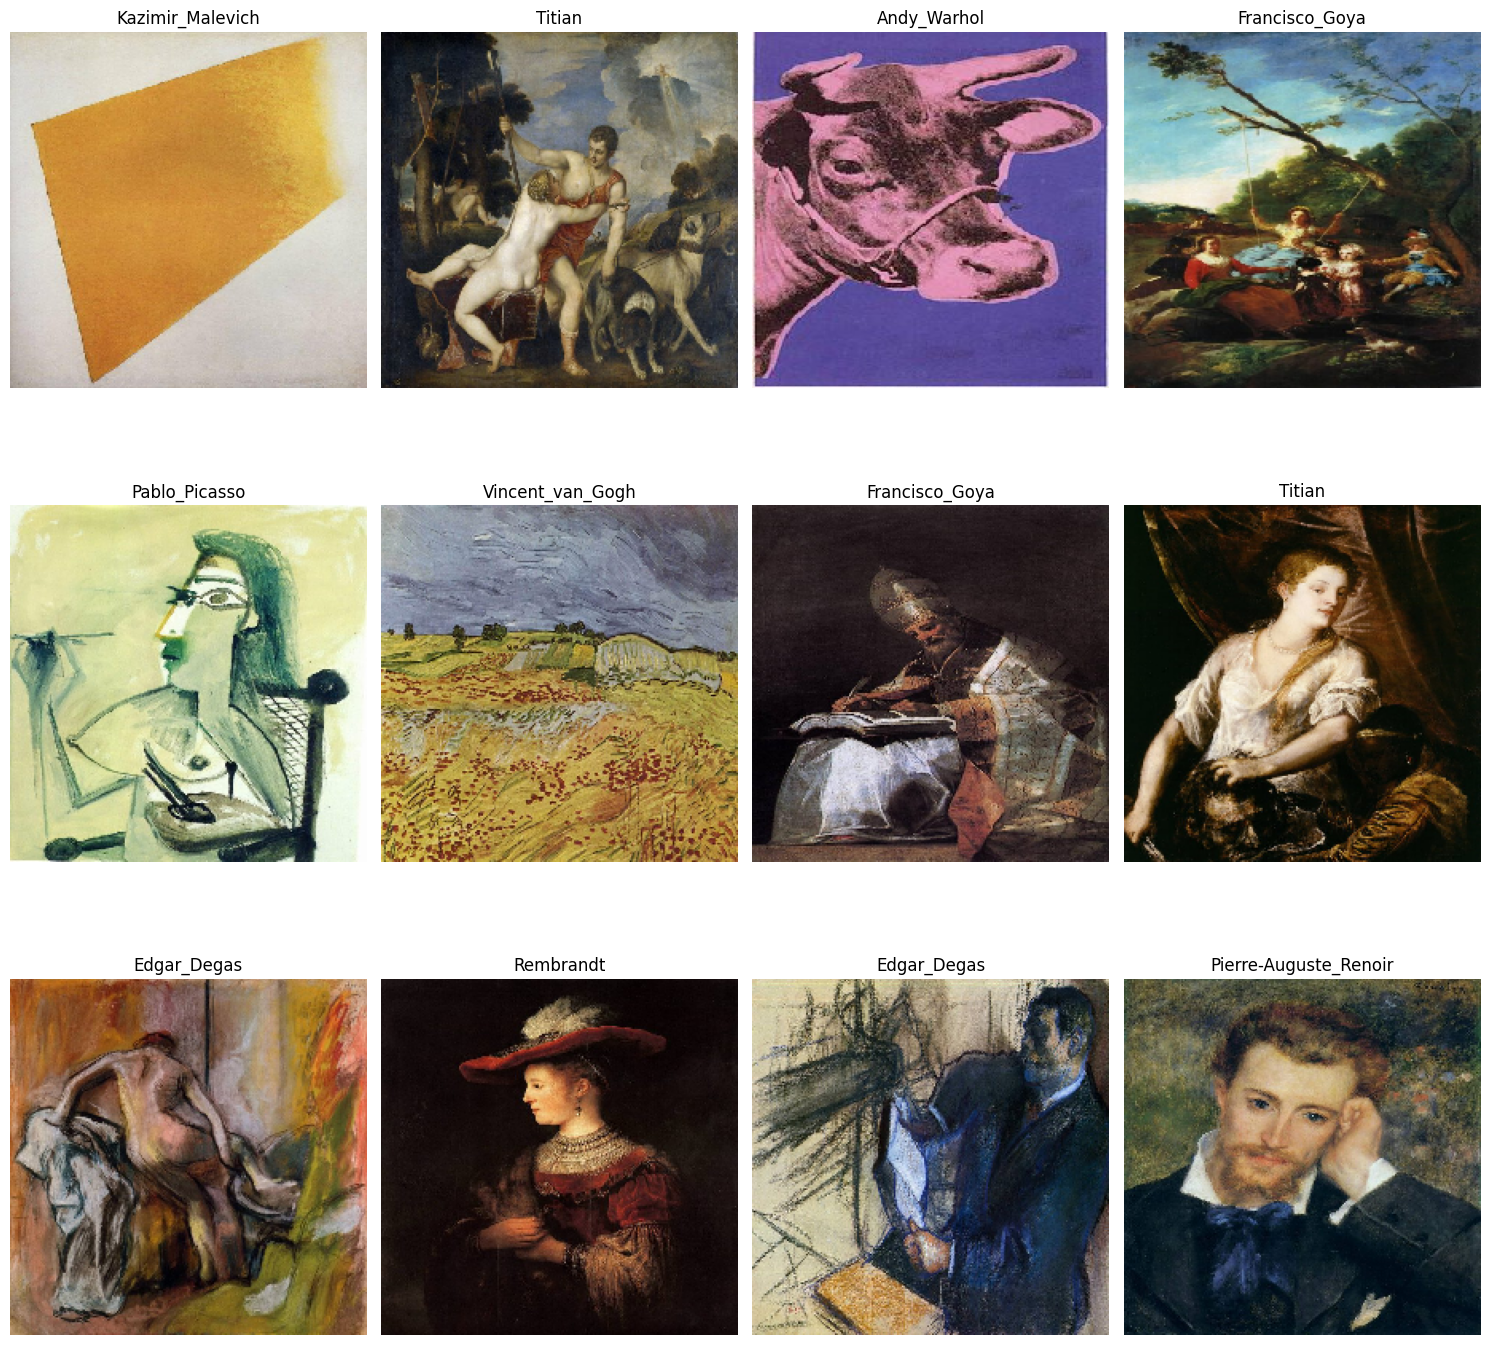

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
random_indices = np.random.choice(df_train.index, size=12, replace=False)
for i, ax in zip(random_indices, axes.flatten()):
    img = keras.preprocessing.image.load_img(df_train.full_path[i], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(df_train.painter[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون نیاز است هر نمونه را با یک برچسب عددی نمایش دهیم. در این قسمت می‌توانید از تابع <code>LabelEncoder</code> استفاده کرده و ستون <code>painter</code> را به‌صورت عددی کدگذاری کرده و حاصل را در ستون جدیدی با نام <code>label</code> ذخیره کنید.
</font>
</p>

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['painter'])
df_train.head()

,full_path,painter,label
0,data/Pablo_Picasso_103.jpg,Pablo_Picasso,13
1,data/Peter_Paul_Rubens_83.jpg,Peter_Paul_Rubens,16
2,data/Pablo_Picasso_143.jpg,Pablo_Picasso,13
3,data/Rene_Magritte_29.jpg,Rene_Magritte,20
4,data/Albrecht_Durer_159.jpg,Albrecht_Durer,0


In [10]:
print(df_train['label'].unique().min())
print(df_train['label'].unique().max())

0
24


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای آن‌که بتوانیم به‌کمک تابع <code>image_dataset_from_directory</code> کراس مجموعه‌داده را به‌صورت مناسبی برای ورودی مدل آماده کنیم، نیاز است تصاویر را در پوشه‌های جداگانه‌ای بر اساس برچسب‌های‌شان قرار دهیم. در قطعه‌کد زیر ابتدا به‌ازای هر برچسب یک پوشه با همان نام در داخل پوشه‌ی <code>data</code> ایجاد می‌کنیم. سپس تصاویر مربوط به هر برچسب را به پوشه‌ی متناظر با آن منتقل می‌کنیم.
</font>
</p>

In [11]:
import shutil

# create a folder for each label
for label in df_train.label.unique():
    os.makedirs(f'data/{label}', exist_ok=True)

# move each image to its corresponding label folder
for i, row in df_train.iterrows():
    shutil.move(row.full_path, f'data/{row.label}')

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خوانش مجموعه‌داده
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال که همه‌چیز آماده شده می‌توانیم از <code>image_dataset_from_directory</code> جهت خوانش تصاویر استفاده کنیم. کافیست آرگومان <code>directory</code> را معادل با مسیر پوشه‌ی داده‌های آموزشی یعنی <code dir=ltr>'./data/'</code> قرار دهیم. سایر آرگومان‌های مهم (اندازه‌ی تصویر، برش دادن، اندازه‌ی دسته و غیره) این تابع را نیز مطابق با نظر خودتان تنظیم کنید. همچنین اگر قصد دارید بخشی از داده‌ها را برای اعتبارسنجی جدا کنید، می‌توانید آرگومان <code>validation_split</code> را مقداردهی کرده و برای نمونه‌های آموزشی از <code dir=ltr>subset='training'</code> و برای نمونه‌های اعتبارسنجی از <code dir=ltr>subset='validation'</code> استفاده کنید. توجه داشته باشید که لیست اسامی برچسب‌ها را در متغیر <code>class_names</code> ذخیره کرده‌ایم تا در هنگام نگاشت خروجی مدل به برچسب‌ها از آن استفاده کنیم.
</font>
</p>

In [25]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory = './data/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    seed = 1,
    shuffle = True,
    validation_split = 0.2,
    subset = 'training'

)

# find the class names so in prediction time we can map the predictions to the painters properly
class_names = train_dataset.class_names
print('Class names:', class_names)

val_dataset = image_dataset_from_directory(
    directory = './data/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    seed = 1,
    shuffle = True,
    validation_split = 0.2,
    subset = 'validation'
)

Found 6516 files belonging to 25 classes.
Using 5213 files for training.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']
Found 6516 files belonging to 25 classes.
Using 1303 files for validation.


In [26]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
فراموش نکنید که در استفاده از مدل‌های پیش‌آموخته نیاز است که تابع پیش‌پردازش ویژه‌ی مدل مورد نظر خود را بر روی تصاویر مجموعه‌داده اعمال کنیم. بنابراین در این قسمت تابع <code>preprocess_input</code> از بخش <code>keras.applications.resnet50</code> را بر روی داده‌های خود اعمال کنید.
</font>
</p>

In [27]:
from keras.applications.resnet50 import preprocess_input

# Preprocess the data
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم از یک معماری کانولوشنی بزرگ و مشهور با نام <i>ResNet</i> بهره ببریم. این معماری که توسط محققان شرکت مایکروسافت ارائه شده است، توانسته است با استفاده از بلوک‌هایی به نام <i>Residual Block</i> و همچنین تکنیک اتصال پرشی/مستقیم (skip connection) مشکلی که معمولاً با افزایش تعداد لایه‌های شبکه‌های عصبی عمیق به‌وجود می‌آید یعنی مشکل محو شدن گرادیان‌ها را حل کند. این معماری متشکل از بلوک‌هایی‌ست که پشت سر هم قرار گرفته‌اند و هر بلوک شامل چندین لایه‌ی کانولوشنی و یک لایه‌ی اتصال پرشی است. در تصویر زیر ساختار کلی یک بلوک <i>Risidual</i> را مشاهده می‌کنید. همان‌طور که مشاهده می‌شود، ورودی بلوک به‌صورت مستقیم به خروجی آن اضافه می‌شود که این تکنیک با نام <i>skip connection</i> شهرت دارد و امروزه در بسیاری از شبکه‌های عصبی عمیق به‌کار می‌رود. نیازی به یادگیری دقیق تمام جزئیات این مدل نیست زیرا که کتابخانه‌ی کراس به‌صورت آماده این مدل را پیاده‌سازی کرده و در اختیارمان قرار می‌دهد. با این حال اگر علاقه داشته باشید ساختار دقیق این مدل را مطالعه کنید می‌توانید از لینک‌هایی که به‌عنوان منابع بیشتر قرار داده شده استفاده کنید.
</font>
</p>


<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:purple"><b>مطالعه‌ی بیشتر 😎</b></summary>

جهت مطالعه‌ی بیشتر درباره‌ی این مدل و همچنین تکنیک اتصال پرشی می‌توانید از لینک‌های زیر بهره ببرید:

<ul dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<li><a href="https://arxiv.org/pdf/1512.03385.pdf" target="_blank">مقاله‌ی اصلی با عنوان <i>Deep Residual Learning for Image Recognition</i> | مقاله‌ی علمی</a></li>
<li><a href="https://keras.io/api/applications/resnet/#resnet-and-resnetv2" target="_blank">مستندات کراس درباره‌ی مدل <i>ResNet</i> | مستندات پیاده‌سازی</a></li>
<li><a href="https://youtu.be/ZILIbUvp5lk" target="_blank">مقدمه‌ای از <i>Residual block</i> و <i>Skip connection</i> | یوتیوب</a></li>
<li><a href="https://youtu.be/RYth6EbBUqM" target="_blank">چرا <i>ResNet</i> خوب کار می‌کند؟ | یوتیوب</a></li>
<li><a href="https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8" target="_blank">تشریح معماری <i>ResNet</i> | مقاله‌ی بلاگ</a></li>

</details>

<center>
<img align="center" src="https://quera.org/qbox/view/bmFJQOQRQY/residual_block.png">
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید که نسخه‌های مختلفی از این معماری در دسترس است که از نظر تعداد لایه‌ها و اندازه‌ی فیلترها متفاوت‌اند. در این تمرین ما از نسخه‌ی <code>ResNet50</code> استفاده خواهیم کرد که شامل ۵۰ لایه‌ی کانولوشنی است. در کراس می‌توانیم از ماژول <code>keras.applications.ResNet50</code> به این معماری دسترسی داشته باشیم.
پیشنهاد می‌کنیم حالت‌های مختلف استفاده از یک مدل پیش‌آموخته را آزمایش کنید تا بتوانید تاثیر هر روش را مشاهده کنید. به‌عنوان مثال یک‌بار کل مدل <code>ResNet50</code> را بدون استفاده از وزن‌های پیش‌آموخته آموزش دهید. یک‌بار از وزن‌های پیش‌آموخته به‌عنوان وزن‌های اولیه استفاده کنید و تمام لایه‌ها را قابل آموزش تنظیم کنید. یک‌بار نیز تعدادی از لایه‌های انتهایی را قابل آموزش کرده و باقی را فریز کنید.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:orange"><b>نکته:</b></span>
پیشنهاد می‌کنیم پس از آموزش مدل خود، یک‌‌بار نیز از تکنیک تقویت داده (Data Augmentation) استفاده کرده و تاثیر آن را بررسی کنید.
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تابعی با نام <code>display_curves</code> در اختیار شما قرار گرفته تا در صورت علاقه بتوانید با ورودی دادن <code>history</code> مدل و معیار مورد نظر (<code>'loss'</code> یا <code>'accuracy'</code>)، نمودار عملکرد مدل روی مجموعه‌ی آموزشی و اعتبارسنجی را رسم کنید.
</font>
</p>

In [43]:
import plotly.express as px
from keras import layers

# metric: 'accuracy' or 'loss'
def display_curves(history, metric):
  df = pd.DataFrame(history.history[metric], columns=[metric])
  df['val_'+metric] = history.history['val_'+metric]
  fig = px.line(df, x= df.index+1, y= [metric, 'val_'+metric])
  fig.update_layout(xaxis_title='Epochs', yaxis_title=metric)
  fig.show()

In [33]:
model = keras.applications.ResNet50(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = 'imagenet',
    pooling = 'avg'
)
# Complete the model based on your choice of the architecture

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [46]:
x = model.output
x = layers.Dense(24, activation='softmax')(x)

# Create the new model
model = keras.models.Model(inputs=model.input, outputs=x)

In [47]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,636,888 (90.17 MB)

 Trainable params: 23,583,768 (89.96 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [49]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [50]:
history = model.fit(train_dataset,
                    epochs=1,
                    validation_data=val_dataset,

)

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-50-cd5e2401c2aa>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 24 which is outside the valid range of [0, 24).  Label values: 16 22 7 24 19 14 16 19 24 22 5 17 17 19 10 19 3 12 19 21 7 9 17 17 1 6 19 7 7 17 20 23
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24942]

In [ ]:
display_curves(history, 'loss')

In [ ]:
display_curves(history, 'accuracy')

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این قسمت از مدل آموزش‌یافته‌ی خود به‌منظور پیش‌بینی هنرمند نمونه‌های آزمون که در پوشه‌ی <code>test_data</code> قرار گرفته‌اند استفاده کنید.
 پیشنهاد می‌کنیم برای اطمینان از عملکرد مدل خود و بهبود آن، ابتدا آن را بر روی یک مجموعه‌ی اعتبارسنجی آزمایش کنید.
</font>
</p>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تمرین  از معیار <code>Accuracy</code> جهت ارزیابی عملکرد مدل شما استفاده خواهد شد (نمونه‌های آزمون دارای توزیع متوازن از برچسب‌ها هستند).
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>92.85</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

In [ ]:
# TODO: evaluate the model on the validation dataset

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساختار خروجی برای نمونه‌های آزمون
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 پیش‌بینی مدل خود را برای نمونه‌های آزمون به‌شکل نام هنرمند (نه عددی) تولید کرده و در ستون <code>artist</code> یک دیتافریم با نام <code>submission</code> در قالب جدول زیر ذخیره کنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>file</code>|نام فایل تصویر (مشابه با نمونه‌ی آزمون و بدون پسوند <code dir=ltr>.jpg</code> مثل <code>test_0</code>|
|<code>artist</code>|هنرمند اثر (پیش‌بینی مدل)|
    
</font>
</div>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
در تبدیل خروجی مدل به برچسب‌ها توجه داشته باشید که اگر از تابع <code>image_dataset_from_directory</code> جهت خواندن تصاویر استفاده کرده‌اید، ترتیب برچسب‌ها به آن شکلی نیست که انتظارش را داریم و به شکل زیر خواهد بود. بنابراین خروجی نورون سوم برابر پیش‌بینی برچسب ۱۰ است و نه ۲! پس اگر روی خروجی مدل تابع <code>np.argmax</code> اعمال کنید برچسب‌های درستی تولید نمی‌شود. این موضوع یکی از چالش‌های رایج در پروژه‌های دسته‌بندی تصویر است که مشاهده می‌کنیم مدل روی داده‌های آموزشی و اعتبارسنجی به‌خوبی عمل می‌کند اما در زمان آزمون عملکرد بسیار بدی از خود نشان می‌دهد و شوکه می‌شویم. دلیلش این است که نگاشت خروجی به برچسب را به‌درستی انجام نداده‌ایم. در این قسمت می‌توانید از متغیر <code>class_names</code> برای تبدیل هر نمایه به برچسب متناظر استفاده کنید.
</font>
</p>

`['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']`


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:orange"><b>نکته:</b></span>
در صورتی‌که از تابع <code>image_dataset_from_directory</code> جهت بارگیری نمونه‌های آزمون استفاده می‌کنیم، در صورت نیاز به دسترسی مسیر فایل‌های خوانده‌شده می‌توانید از خصوصیت <code>file_paths</code> بهره ببرید.
</p>


In [ ]:
submission = pd.DataFrame(columns=['file', 'artist'])
submission['file'] = None # TODO: get the file names from the test dataset
submission['artist'] = None # TODO: get the predictions from the model (name of the painter)
submission

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول‌های زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. همچنین اگر از گوگل کولب استفاده می‌کنید، در صورت نیاز به پشتیبانی حتماً آخرین نسخه از نت‌بوک را به‌صورت دستی دانلود کرده و داخل فایل ارسالی قرار دهید یا لینک کولب را با ما به‌اشتراک بگذارید.
</font>
</p>

In [ ]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'artist.ipynb')):
    %notebook -e artist.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['submission.csv', 'artist.ipynb']
compress(file_names)